Mencek Version

In [6]:
import tensorflow as tf
print(tf.__version__)

2.17.0


Install Gdown

In [7]:
!pip install gdown

Unduh File menggunakan gdown

In [8]:
!gdown --id 1ZKnT0F95tRNnjo57qMixfACoFy3ITEj7 -O /tmp/messy_vs_clean_room.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ZKnT0F95tRNnjo57qMixfACoFy3ITEj7
From (redirected): https://drive.google.com/uc?id=1ZKnT0F95tRNnjo57qMixfACoFy3ITEj7&confirm=t&uuid=e7d2b3b8-1821-44cd-8b1b-4edf42e2c7d4
To: /tmp/messy_vs_clean_room.zip
100% 70.4M/70.4M [00:02<00:00, 30.5MB/s]


Ekstraksi pada file zip

In [9]:
 # melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [10]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [11]:
os.listdir('/tmp/images/val')

['clean', 'messy']

Kode berikut menunjukkan proses augmentasi gambar pada setiap sampel di dataset.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
                    rescale=1./255)

siapkan data latih dan validasi dari kumpulan data gambar yang di-load dalam
memori melalui fungsi flow() berikut.

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    class_mode='binary'  # karena ini merupakan masalah klasifikasi 2 kelas
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # direktori data validasi
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,  # karena ini merupakan masalah klasifikasi 2 kelas
    class_mode='binary'
)


Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


layer max pooling berguna untuk mereduksi resolusi gambar
sehingga proses pelatihan model lebih cepat. Nah, pada model CNN, proses klasifikasi
gambar hanya berfokus pada atribut-atribut unik yang membedakan tiap kategori. Sehingga,
teknik ini dinilai lebih optimal dibandingkan hanya menggunakan model MLP yang
membedakan tiap kategori dengan melihat keseluruhan piksel-piksel pada gambar.

In [14]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu',
input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),])
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu',
input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,529,665 (51.61 MB)

 Trainable params: 13,529,665 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
 # compile model dengan 'adam' optimizer loss function
'binary_crossentropy'
model.compile(loss='binary_crossentropy',

optimizer=tf.optimizers.Adam(),

metrics=['accuracy'])

In [17]:
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples,
        verbose=2
    )
except Exception as e:
    print(f"Error: {e}")

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


192/192 - 21s - 108ms/step - accuracy: 0.4844 - loss: 0.7487 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
192/192 - 15s - 77ms/step - accuracy: 0.5521 - loss: 0.6888 - val_accuracy: 0.5000 - val_loss: 0.6478
Epoch 3/5
192/192 - 20s - 106ms/step - accuracy: 0.6094 - loss: 0.6818 - val_accuracy: 0.7000 - val_loss: 0.6638
Epoch 4/5
192/192 - 21s - 111ms/step - accuracy: 0.6562 - loss: 0.6787 - val_accuracy: 0.8000 - val_loss: 0.5982
Epoch 5/5
192/192 - 20s - 103ms/step - accuracy: 0.6719 - loss: 0.5988 - val_accuracy: 0.7500 - val_loss: 0.5002


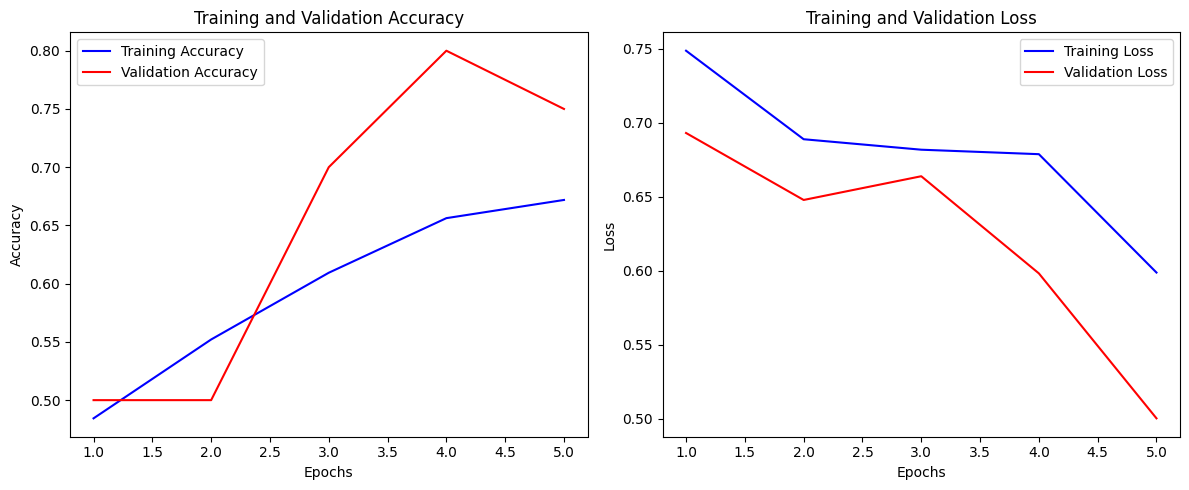

In [18]:
import matplotlib.pyplot as plt
# Plot akurasi dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Visualisasi Akurasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Saving 95.png to 95 (4).png
Saving 7.png to 7 (5).png
Saving 8.png to 8 (5).png
Saving 9.png to 9 (5).png
Saving 66.png to 66 (3).png
Saving 67.png to 67 (3).png
Saving 68.png to 68 (3).png
Saving 69.png to 69 (3).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
95 (4).png
Predicted probability: 0.5004143118858337
The room is messy


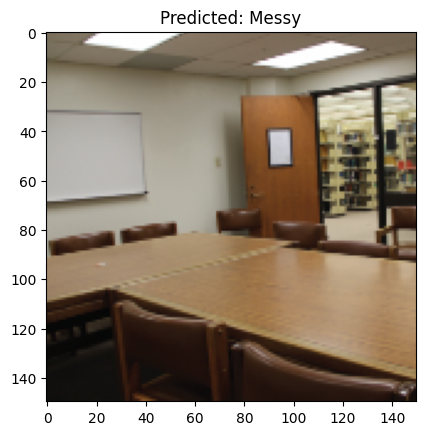

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
7 (5).png
Predicted probability: 0.8587602972984314
The room is messy


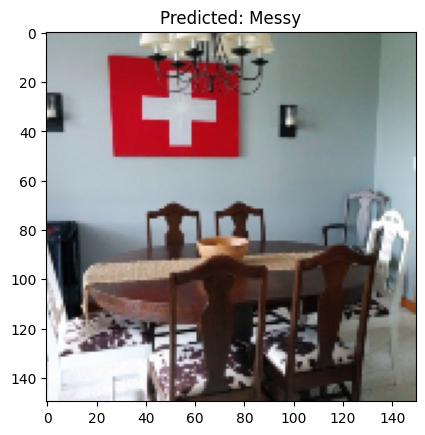

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
8 (5).png
Predicted probability: 0.3977925181388855
The room is clean


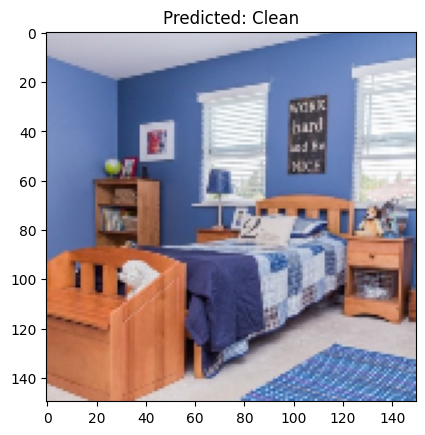

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
9 (5).png
Predicted probability: 0.3238811492919922
The room is clean


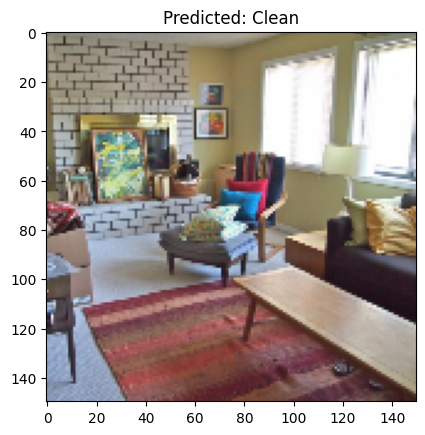

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
66 (3).png
Predicted probability: 0.31980589032173157
The room is clean


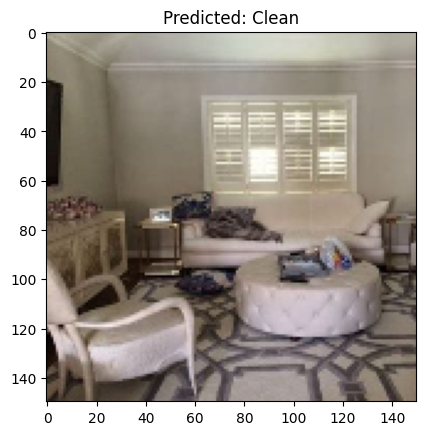

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
67 (3).png
Predicted probability: 0.26158931851387024
The room is clean


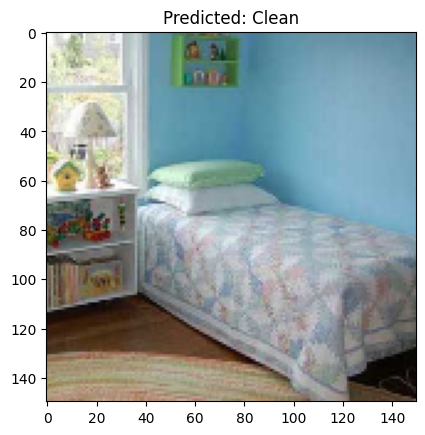

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
68 (3).png
Predicted probability: 0.49130746722221375
The room is clean


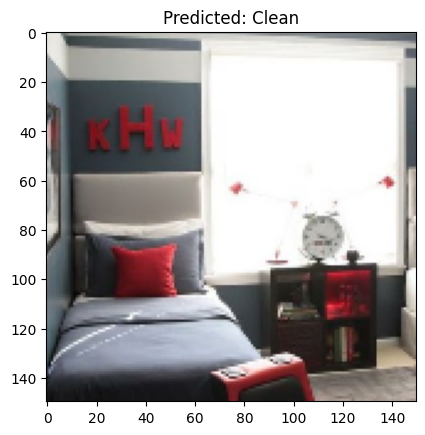

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
69 (3).png
Predicted probability: 0.3003414571285248
The room is clean


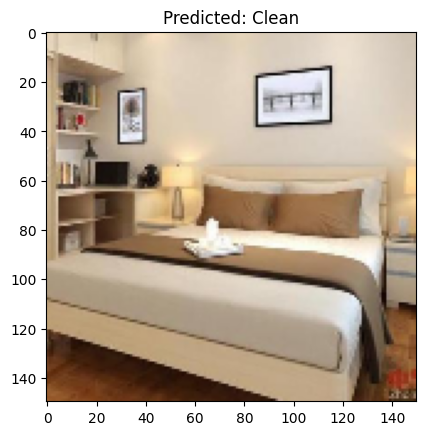

In [20]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    # Memuat gambar dan mengatur ukuran
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    # Menampilkan gambar
    plt.imshow(img)

    # Mengonversi gambar ke array dan melakukan rescale
    x = image.img_to_array(img) / 255.0  # Skala gambar
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    # Melakukan prediksi
    classes = model.predict(images, batch_size=10)

    # Menampilkan hasil prediksi
    print(fn)
    print(f"Predicted probability: {classes[0][0]}")  # Menampilkan probabilitas prediksi

    # Tentukan hasil berdasarkan probabilitas
    if classes[0][0] < 0.5:  # Threshold 0.5 untuk biner
        print('The room is clean')
        plt.title('Predicted: Clean')  # Menambahkan keterangan di judul gambar
    else:
        print('The room is messy')
        plt.title('Predicted: Messy')  # Menambahkan keterangan di judul gambar

    # Menampilkan gambar dengan keterangan
    plt.show()